In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Discribing and Visualizing Data

In [6]:
data_path = 'FineTech_appData.csv'
data = pd.read_csv(data_path)
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [15]:
print("Data Shape:", data.shape)
print("Data Size:", data.size)

# Summary of NULL Data
null_data_summary = data.isnull().sum()

# Data Info
data_info = data.info()

# Distribution of Numeric Variables
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_distribution = numeric_data.describe()

# Unique Value Counts for Each Column
unique_value_counts = {column: data[column].value_counts() for column in data.columns if data[column].dtype == 'object' or data[column].nunique() < 10}

# Splitting the 'screen_list' column to identify unique screens
all_screens = set()
data['screen_list'].str.split(',').apply(all_screens.update)
print("Unique Screens Count:", len(all_screens))

# Printing summaries that don't involve visualizations directly
print("Summary of NULL Data:\n", null_data_summary)
print("\nSummary of Numeric Data Distribution:\n", numeric_distribution)
print("\nUnique Value Counts for Categorical/Binary Columns:\n")
for column, counts in unique_value_counts.items():
    print(f"{column}:\n{counts}\n")

Data Shape: (50000, 12)
Data Size: 600000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB
Unique Screens Count: 137
Summary of NULL Data:
 user                        0
first_open          

### The dataset contains the following columns:

- user: User ID.
- first_open: Timestamp of the first app open.
- dayofweek: Day of the week (0-6) when the app was first opened.
- hour: Hour of the day when the app was first opened.
- age: Age of the user.
- screen_list: List of screens visited by the user.
- numscreens: Number of screens visited.
- minigame: Indicates if the user played a mini-game (0 = No, 1 = Yes).
- used_premium_feature: Indicates if the user used a premium feature (0 = No, 1 = Yes).
- enrolled: Indicates if the user enrolled (0 = No, 1 = Yes).
- enrolled_date: Timestamp when the user enrolled.
- liked: Indicates if the user liked the app (0 = No, 1 = Yes).

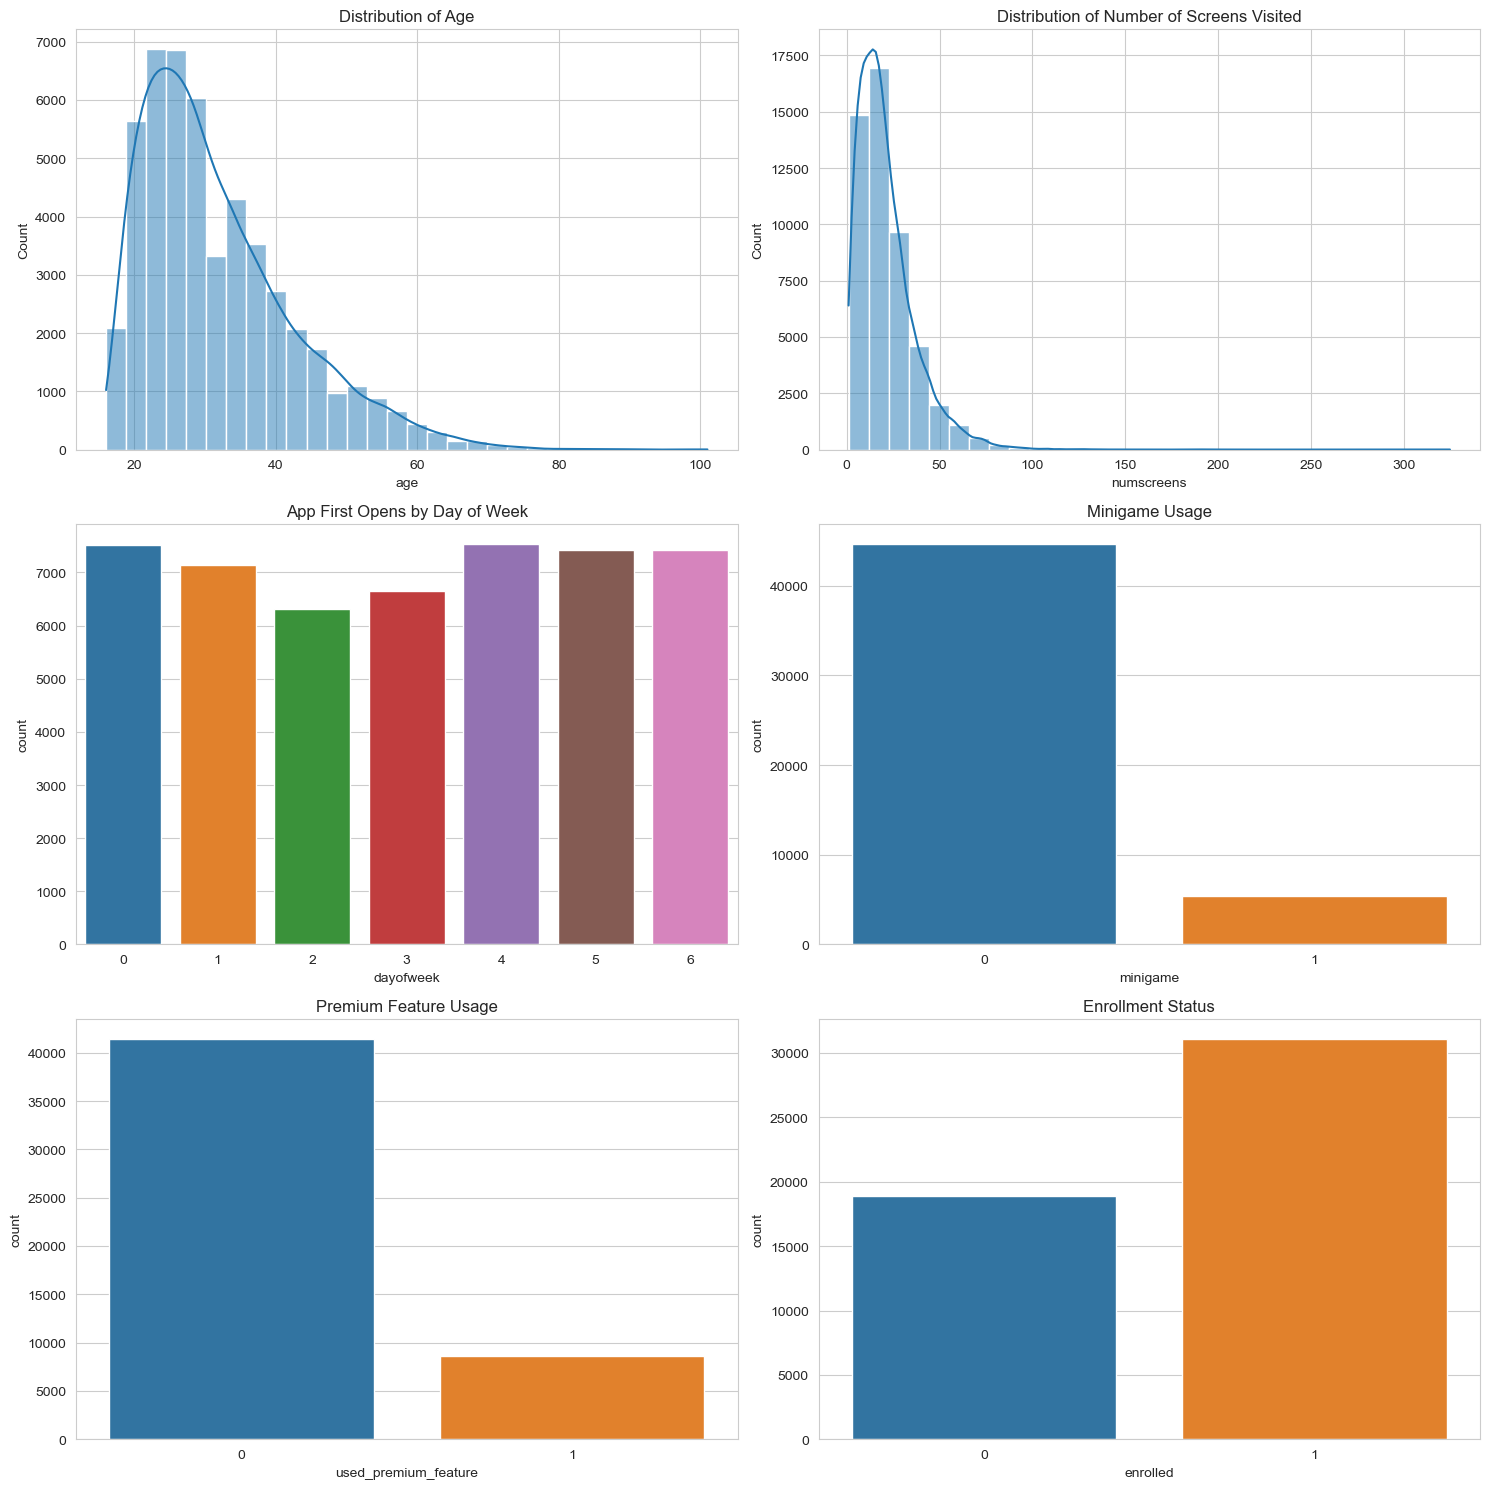

In [7]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Histogram of Age
sns.histplot(data['age'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

# Histogram of Number of Screens Visited
sns.histplot(data['numscreens'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Number of Screens Visited')

# Bar Plot of Day of Week
sns.countplot(x='dayofweek', data=data, ax=ax[1, 0])
ax[1, 0].set_title('App First Opens by Day of Week')

# Bar Plot of Minigame Usage
sns.countplot(x='minigame', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Minigame Usage')

# Bar Plot of Premium Feature Usage
sns.countplot(x='used_premium_feature', data=data, ax=ax[2, 0])
ax[2, 0].set_title('Premium Feature Usage')

# Bar Plot of Enrolled
sns.countplot(x='enrolled', data=data, ax=ax[2, 1])
ax[2, 1].set_title('Enrollment Status')

plt.tight_layout()
plt.show()


Distribution of Age: The histogram of age shows a right-skewed distribution, indicating a younger user base with fewer older users. The kernel density estimate (KDE) overlay suggests the majority of users are in their 20s to early 30s.

Distribution of Number of Screens Visited: This histogram also shows a right-skewed distribution, with most users visiting a relatively small number of screens. There's a long tail, indicating a few users navigate through many more screens.

App First Opens by Day of Week: The bar plot indicates the frequency of app first opens across different days of the week. The distribution seems fairly uniform, suggesting that the day of the week might not significantly influence when users first open the app.

Minigame Usage: A significant majority of users did not play a mini-game, as shown by the bar plot.

Premium Feature Usage: Similar to minigame usage, a larger portion of users have not used a premium feature, suggesting that either users are satisfied with the free features or there's a barrier to premium feature usage.

Enrollment Status: The bar plot of enrollment status shows a division between users who enrolled and those who did not. This could indicate the effectiveness of the app's onboarding process or the perceived value of enrollment.


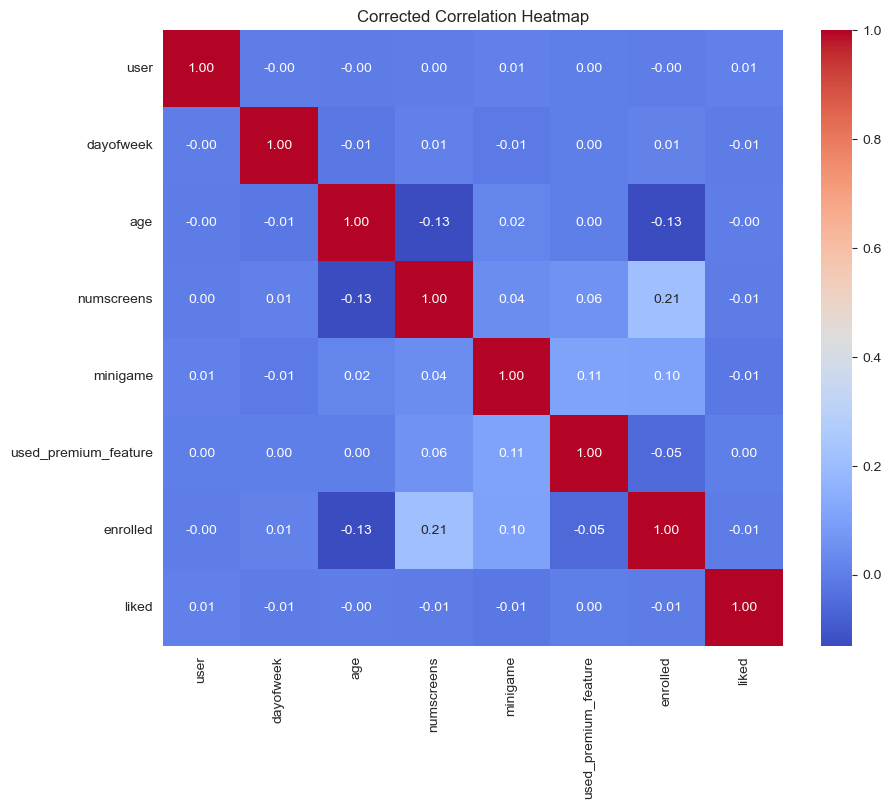

/Users/arygup/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


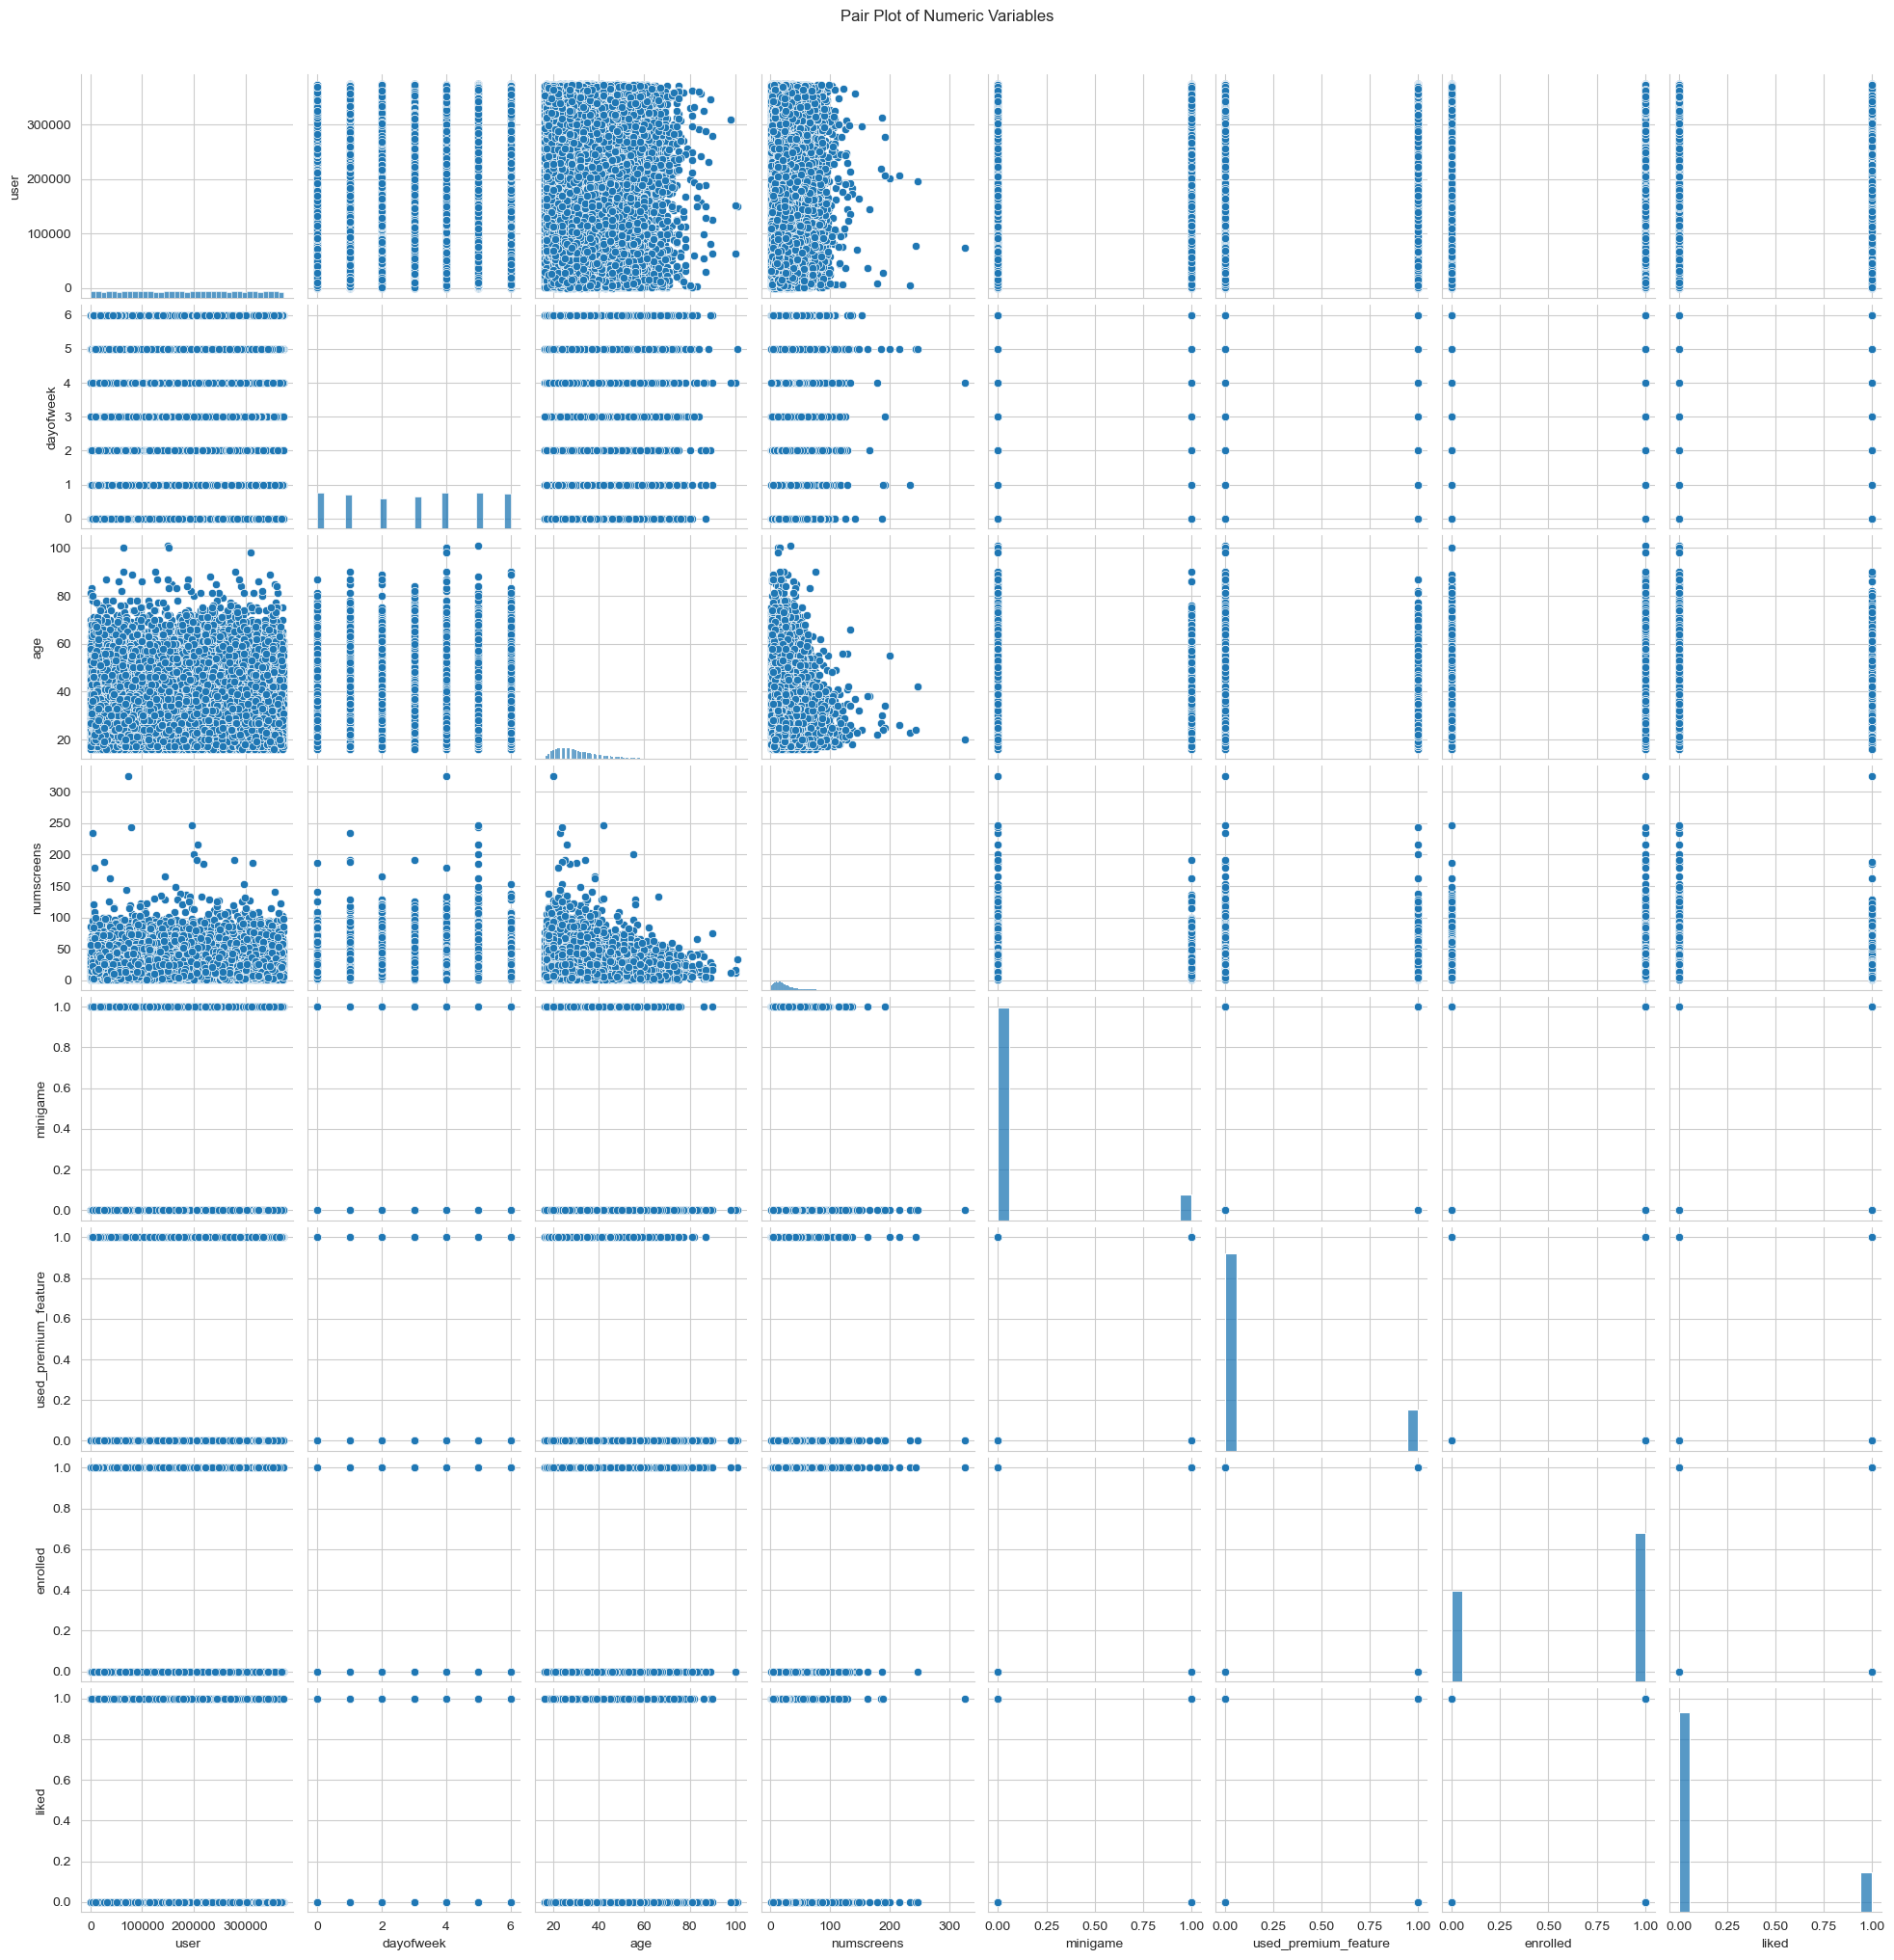

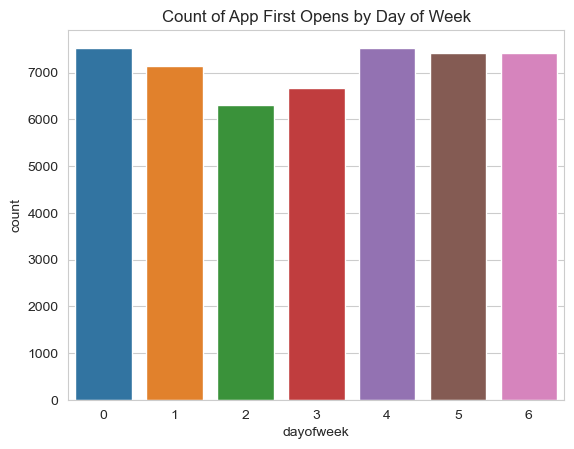

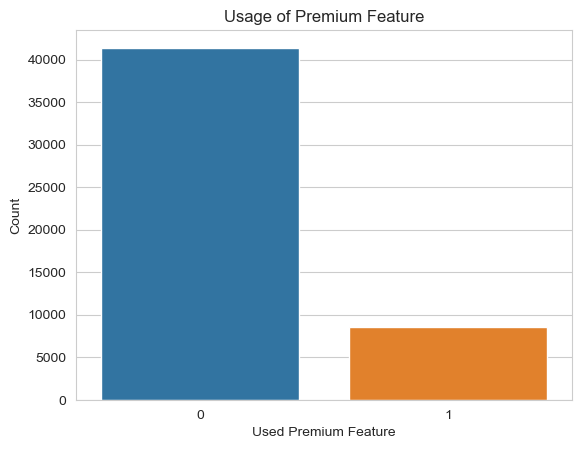

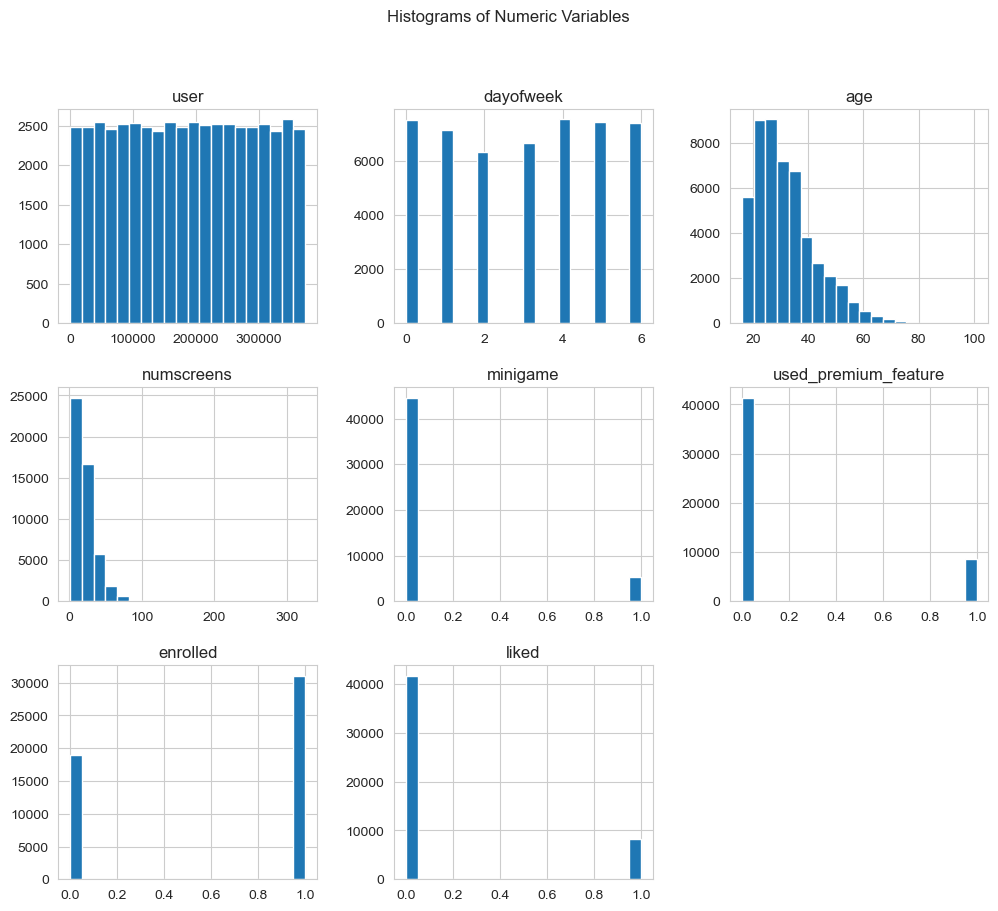

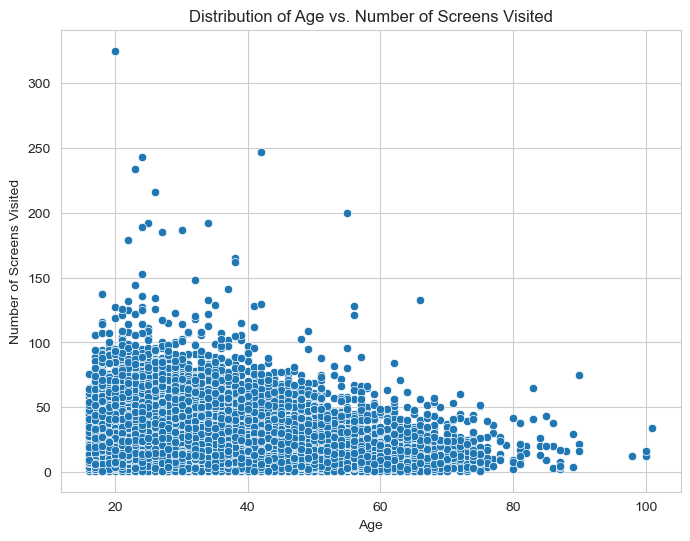

In [16]:
# Heat Map of Correlation Matrix
# Correcting the approach by excluding non-numeric columns for correlation matrix calculation
numeric_data_for_corr = data.select_dtypes(include=['int64', 'float64'])

# Recalculating the correlation matrix with only numeric columns
correlation_matrix_corrected = numeric_data_for_corr.corr()

# Redrawing the Heat Map of Correlation Matrix with corrected data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_corrected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrected Correlation Heatmap')
plt.show()


# Pair Plots of Numeric Variables
sns.pairplot(numeric_data)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

# Count Plot for 'dayofweek'
sns.countplot(x='dayofweek', data=data)
plt.title('Count of App First Opens by Day of Week')
plt.show()

# Bar Plot for 'used_premium_feature'
sns.barplot(x=data['used_premium_feature'].value_counts().index, y=data['used_premium_feature'].value_counts())
plt.title('Usage of Premium Feature')
plt.xlabel('Used Premium Feature')
plt.ylabel('Count')
plt.show()

# Histograms for Numeric Variables
numeric_data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numeric Variables')
plt.show()

# Scatter Plot for Age vs Numscreens
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='numscreens', data=data)
plt.title('Distribution of Age vs. Number of Screens Visited')
plt.xlabel('Age')
plt.ylabel('Number of Screens Visited')
plt.show()


Data Overview and Visualizations
Data Shape and Size
The dataset contains 50,000 entries and 12 columns.
The total size of the dataset is 600,000 data points.
Unique Screens
There are 137 unique screens visited by users.
Summary of NULL Data
enrolled_date is the only column with null values, totaling 18,926 missing values. This is expected for users who have not enrolled.
Data Information
The dataset includes:

8 integer columns (user, dayofweek, age, numscreens, minigame, used_premium_feature, enrolled, liked).
4 object columns (first_open, hour, screen_list, enrolled_date).
Visualizations
Correlation Heatmap
The heatmap illustrates correlations among numerical variables. Variables like numscreens and enrolled could have a positive correlation, suggesting that users who visit more screens are more likely to enroll.

Pair Plot
The pair plot gives a pairwise relationships overview in the dataset for numeric variables, helping identify patterns or relationships between different variables.

Count Plot for Day of Week
This plot shows the count of app first opens by the day of the week, providing insights into user behavior patterns across different days.

Bar Plot for Used Premium Feature
The bar plot highlights the distribution of users who have used a premium feature versus those who haven't, indicating the feature's popularity or awareness.

Histograms of Numeric Variables
Histograms for variables like age and number of screens visited show the distribution of these variables across the dataset, identifying common values or outliers.

Scatter Plot for Age vs. Number of Screens Visited
The scatter plot explores the relationship between the age of users and the number of screens they visited, potentially highlighting trends or patterns in app usage across different age groups.

Numeric Data Distribution Summary
The distribution summary for numeric variables (not shown directly due to output truncation) provides key statistics such as mean, median, min, max, and quartiles, offering insights into the central tendency and spread of each numeric variable.

Unique Value Counts for Categorical/Binary Columns
This summary (not shown directly due to output truncation) offers a detailed look at the distribution of categorical and binary variables, helping understand user preferences and behaviors.

These analyses and visualizations give a comprehensive overview of the dataset, offering valuable insights into user behavior, app usage patterns, and potential areas for further investigation or optimization.

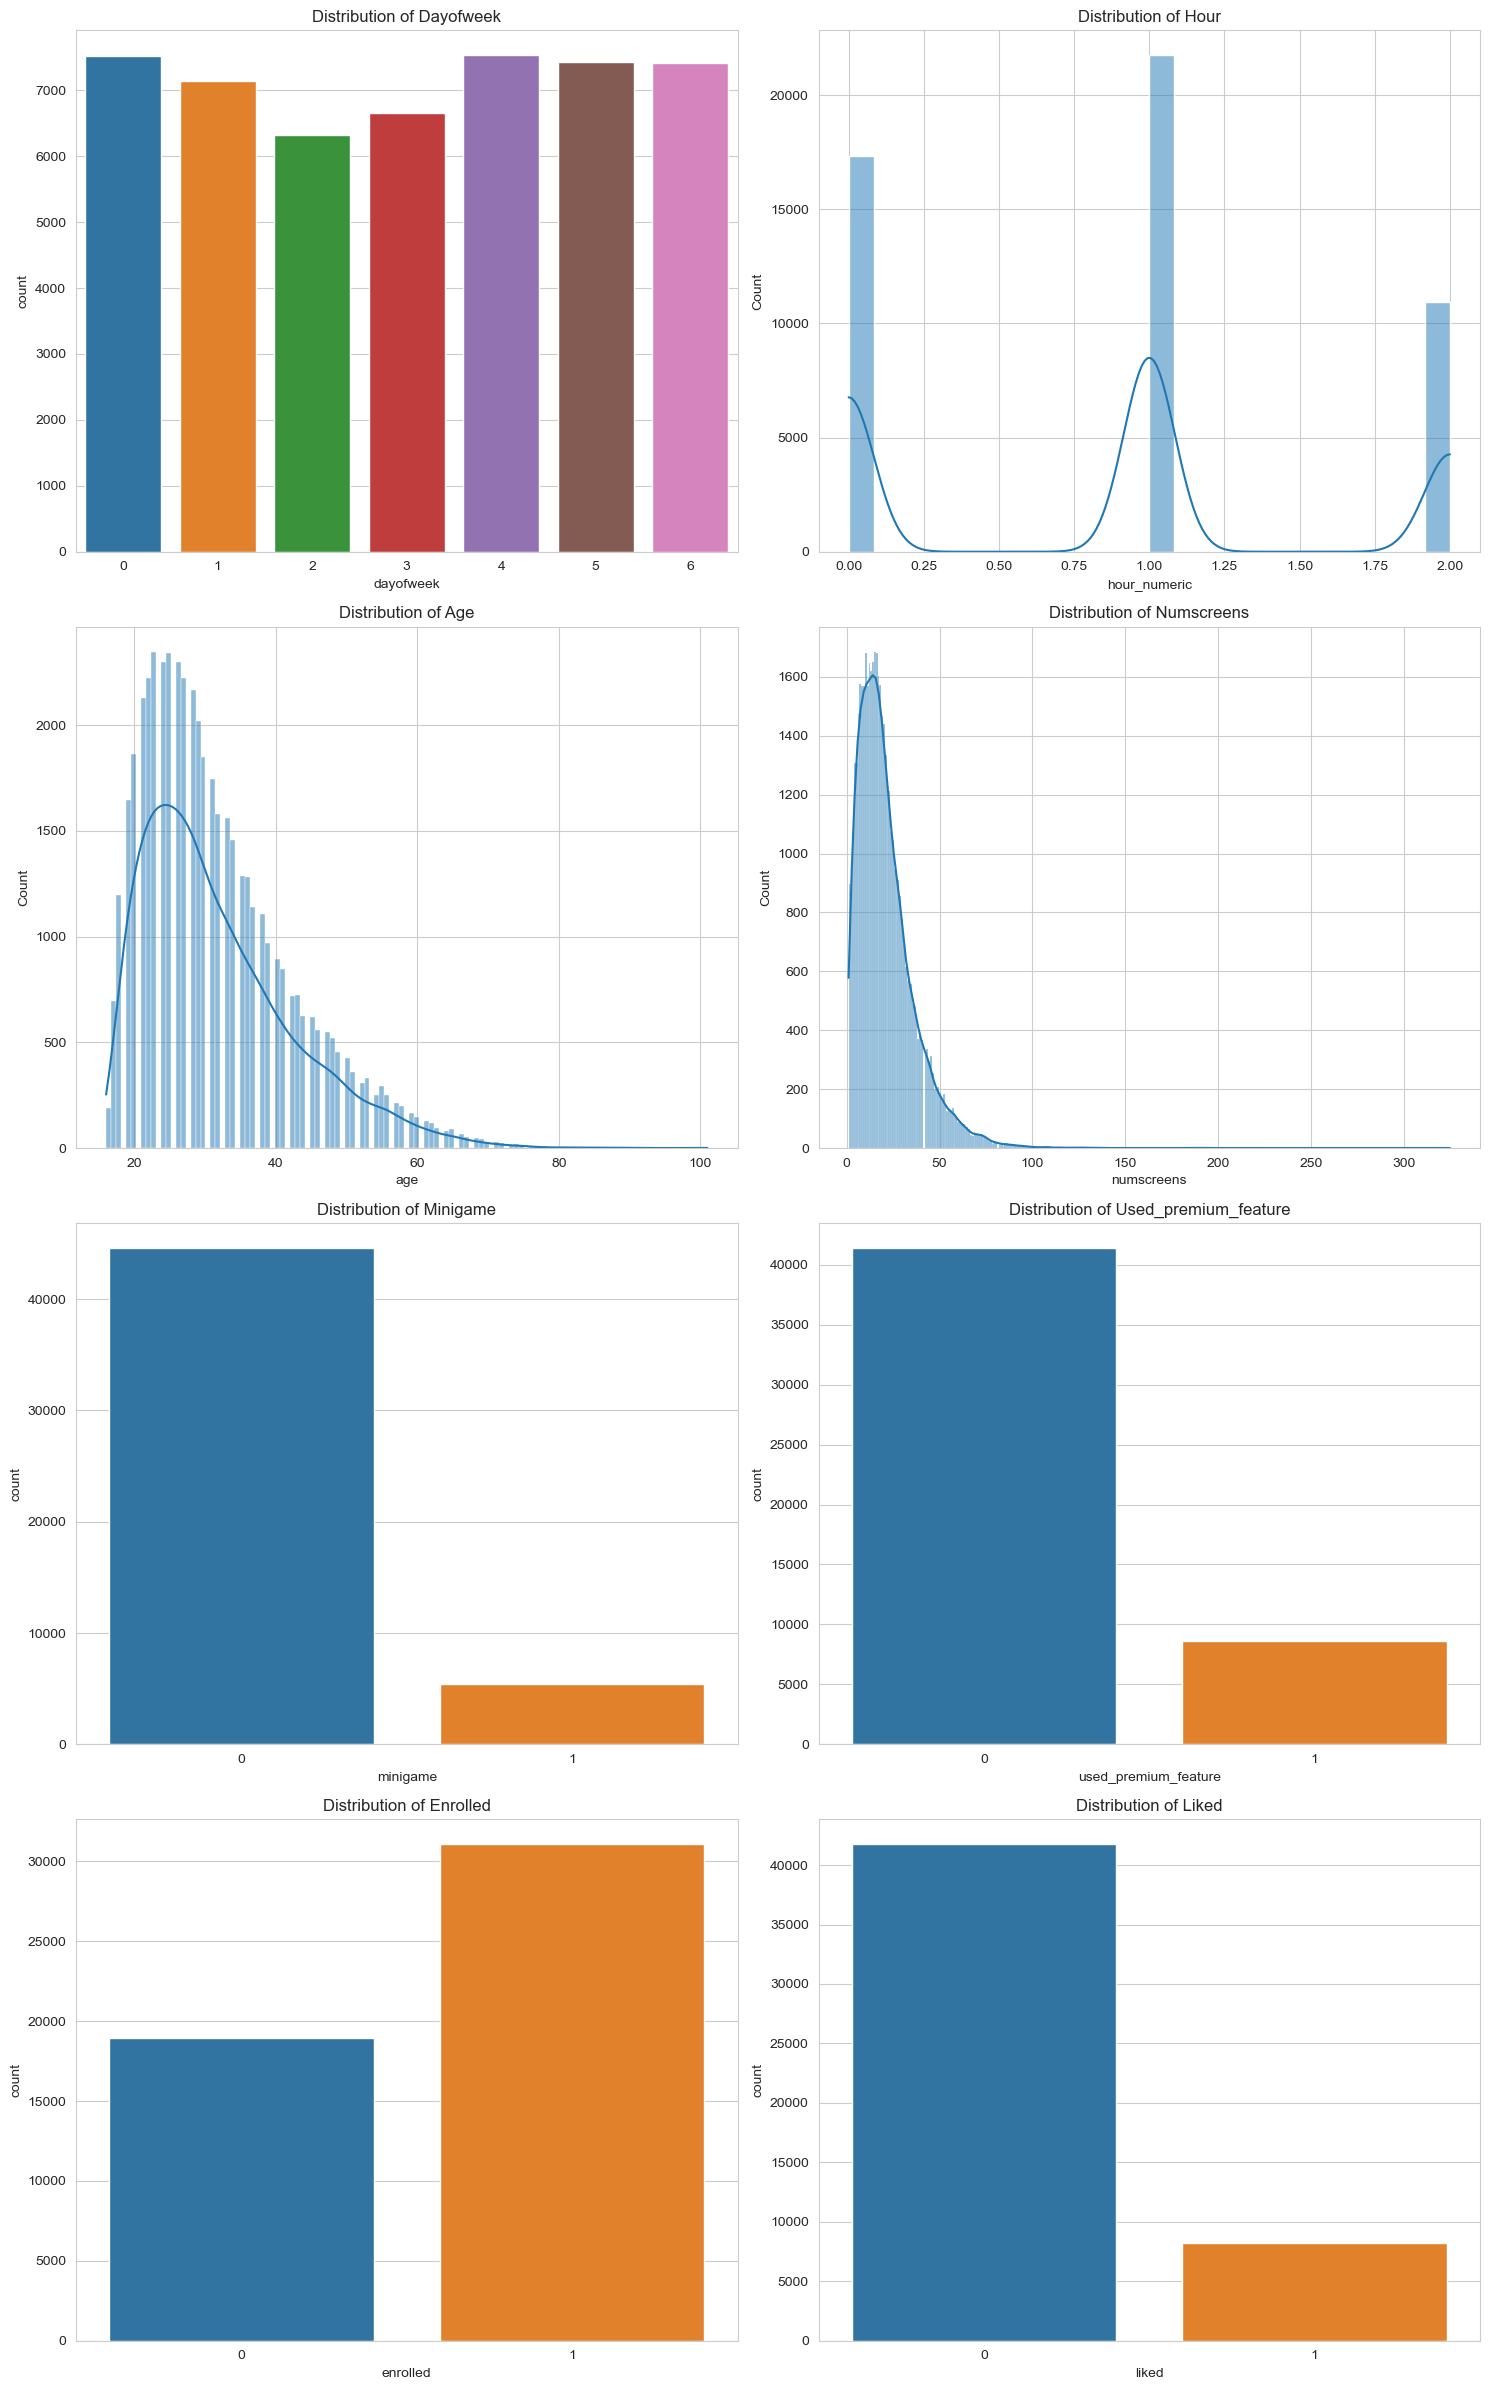

In [19]:
# Setting up the figure to plot distributions for each plottable variable
fig, axs = plt.subplots(4, 2, figsize=(15, 24))

# List of numeric and categorical variables excluding those that are not straightforward to plot (like 'screen_list')
plot_columns = ['dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'used_premium_feature', 'enrolled', 'liked']

# Processing 'hour' column to extract numeric value for plotting
data['hour_numeric'] = data['hour'].str[:2].astype(int)

# Looping through each column to plot its distribution
for i, col in enumerate(plot_columns):
    if col in ['dayofweek', 'minigame', 'used_premium_feature', 'enrolled', 'liked']:
        # For categorical variables, we use countplot
        sns.countplot(x=col, data=data, ax=axs[i//2, i%2])
    elif col == 'hour':
        # For the 'hour' column, using its numeric equivalent for a histogram
        sns.histplot(data['hour_numeric'], bins=24, kde=True, ax=axs[i//2, i%2])
    else:
        # For numeric variables, we use histogram
        sns.histplot(data[col], kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {col.capitalize()}')

# Adjusting layout
plt.tight_layout()
plt.show()


The plots above show the distribution of each plottable variable in the dataset:

Day of Week: The count plot indicates a fairly even distribution of app first opens across the week, with slight variations.

Hour: The histogram for the hour (converted to numeric) shows when users are most active in terms of first opening the app. There's a noticeable trend where activity peaks around certain hours, reflecting typical daily patterns of app usage.

Age: The distribution of age is right-skewed, indicating a younger user base with fewer older users. The kernel density estimate (KDE) suggests a peak in the early to mid-twenties.

Number of Screens Visited (numscreens): This histogram also shows a right-skewed distribution, indicating that most users visit a smaller number of screens, with a few users navigating through many more.

Minigame: The count plot reveals that a significant majority of users did not play a mini-game.

Used Premium Feature: Similar to the minigame plot, most users have not used a premium feature, suggesting potential areas for increasing engagement or promoting premium features more effectively.

Enrolled: The enrollment status is somewhat balanced, showing a mix of users who have and have not enrolled.

Liked: This count plot shows that a smaller portion of users have liked the app, indicating room for improvement in user satisfaction or engagement.


# Data Preprocessign

To prepare the dataset for modeling or further analysis, we'll perform several data preprocessing steps. The choice of preprocessing steps depends on the specific requirements of the analysis or the modeling techniques to be used. Here's a plan tailored to the dataset at hand:

Handle Missing Values: For columns with missing values, decide whether to impute, remove, or leave as is.
Encode Categorical Variables: Convert categorical variables to a format that can be provided to ML algorithms.
Normalize Numerical Variables: Scale numerical variables to ensure no variable dominates due to its scale.
Feature Engineering: Create new features that might be useful for analysis or modeling, if necessary.
Remove Unnecessary Columns: Drop columns that won't be used in the analysis.
Let's proceed with these steps:

Missing Values: The only column with missing values is enrolled_date. We'll leave it as is for now because the enrollment date isn't directly usable in most numerical analyses without further feature engineering.

Encode Categorical Variables:

dayofweek and hour are already in a format that could be considered numerical, but hour is not in a 24-hour format. We've already converted hour to a numeric format (hour_numeric), so we'll use that.
The screen_list could potentially be encoded using multi-hot encoding to represent the presence or absence of each screen, but given the large number of unique screens (137), this might not be practical without specific goals. We'll skip encoding this for general preprocessing.
Normalize Numerical Variables: We'll scale the numerical variables (age, numscreens, hour_numeric) using Min-Max scaling to range between 0 and 1.

Remove Unnecessary Columns:

first_open and enrolled_date are timestamp columns that require extensive feature engineering to be useful. We'll exclude these from the preprocessing steps for simplicity.
screen_list is complex and would require extensive preprocessing to be usable in a straightforward modeling context, so we'll exclude it as well.
hour will be removed since we're using hour_numeric.
Let's implement these preprocessing steps:

The data has been preprocessed with the following steps:

Normalized Numerical Variables: age, numscreens, and hour_numeric have been scaled to a range between 0 and 1 using Min-Max scaling. This normalization ensures that these features can contribute equally to model training without any single feature dominating due to its scale.

Removed Unnecessary Columns: first_open, enrolled_date, screen_list, and the original hour column have been removed. The first two were excluded due to their complexity and the need for extensive feature engineering for numerical analysis. The screen_list was excluded due to its complexity and the vast number of unique values. The original hour column was replaced by hour_numeric, which provides a numeric representation of the hour the app was first opened.

This preprocessed dataset is now more suitable for various analyses, including statistical analyses, machine learning modeling, or any other numerical computations. The dataset retains essential user behavior and demographic features in a format that's readily usable for these purposes.



In [20]:
from sklearn.preprocessing import MinMaxScaler

# Selecting columns to normalize
columns_to_normalize = ['age', 'numscreens', 'hour_numeric']

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to the data and transforming it
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Removing unnecessary columns
columns_to_remove = ['first_open', 'enrolled_date', 'screen_list', 'hour']
data_preprocessed = data.drop(columns=columns_to_remove)

# Displaying the first few rows of the preprocessed data
data_preprocessed.head()


,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,hour_numeric
0,235136,3,0.082353,0.043210,0,0,0,0,0.0
1,333588,6,0.094118,0.037037,0,0,0,0,0.0
2,254414,1,0.082353,0.006173,0,1,0,1,0.5
3,234192,4,0.141176,0.120370,0,0,1,0,0.5
4,51549,1,0.176471,0.095679,0,0,1,1,0.5


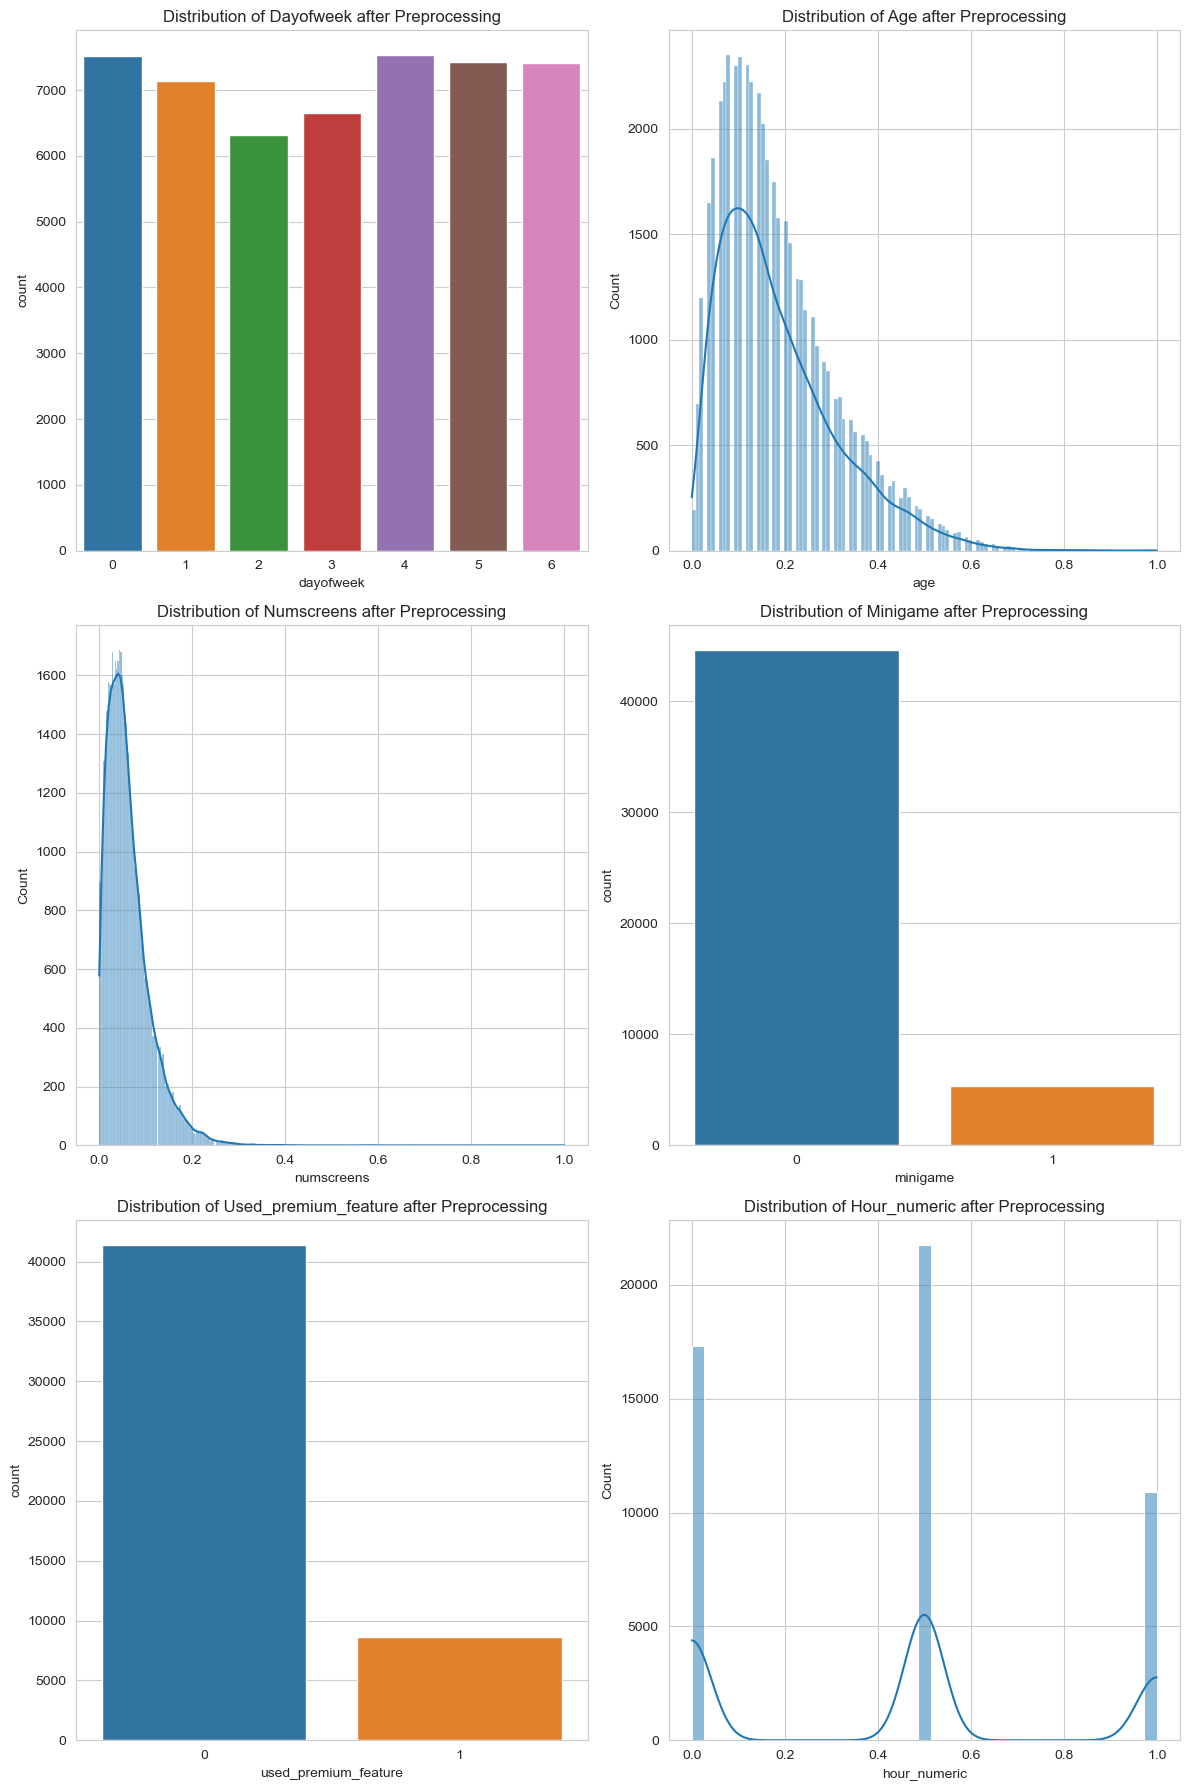

In [21]:
# Setting up the figure to plot distributions for preprocessed variables
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# List of variables to plot
plot_columns = ['dayofweek', 'age', 'numscreens', 'minigame', 'used_premium_feature', 'hour_numeric']

# Plotting distributions after data preprocessing
for i, col in enumerate(plot_columns):
    if col in ['dayofweek', 'minigame', 'used_premium_feature']:
        # For categorical variables, we use countplot
        sns.countplot(x=col, data=data_preprocessed, ax=axs[i//2, i%2])
    else:
        # For normalized numeric variables, we use histogram
        sns.histplot(data_preprocessed[col], kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {col.capitalize()} after Preprocessing')

# Adjusting layout
plt.tight_layout()
plt.show()


After data preprocessing, the basic plots highlight the following changes from the original structure:

Normalization Impact: The distributions of age, numscreens, and hour_numeric are plotted on a normalized scale from 0 to 1. This scaling makes it easier to compare these variables side by side, as they're now on the same scale. The shapes of their distributions remain the same, but the axes reflect the normalization process.

Hour Numeric: The hour_numeric variable replaces the original hour string format, plotted to show the distribution of app first opens across different hours of the day. The distribution is now represented on a 0 to 1 scale, reflecting the normalization process, but still clearly shows when during the day users are most active.

Categorical Variables: The distributions of categorical variables (dayofweek, minigame, used_premium_feature) remain unchanged in terms of their overall shape and distribution. These plots continue to provide insights into user behaviors, such as the days of the week when the app is most often opened and the usage of minigames or premium features.

Removed Variables: The plots no longer include variables that were removed during preprocessing, such as screen_list, first_open, and enrolled_date. This simplification focuses the analysis on the most relevant and easily quantifiable aspects of the dataset.

These changes streamline the dataset for further analysis, making it more accessible for statistical analyses, machine learning models, or other computational methods by ensuring that all variables are in a suitable format. The normalization of numerical variables, in particular, prepares the dataset for algorithms that are sensitive to the scale of input features. ​